In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from datetime import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller

import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_predict

In [65]:
data0 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv",error_bad_lines=False)
data1 = pd.read_csv("Chicago_Crimes_2005_to_2007.csv",error_bad_lines=False)
data2 = pd.read_csv("Chicago_Crimes_2008_to_2011.csv",error_bad_lines=False)
data3 = pd.read_csv("Chicago_Crimes_2012_to_2017.csv",error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\anils\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [66]:
data = pd.concat([data0,data1,data2,data3])

In [67]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [68]:
data.shape

(7941282, 23)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941282 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [70]:
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

In [71]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [72]:
df = data[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [73]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,THEFT,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,OTHER OFFENSE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,THEFT,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,THEFT,RESIDENCE,False,False


In [74]:
df.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1990
Arrest                     0
Domestic                   0
dtype: int64

In [75]:
df = df.dropna()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939292 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 318.0+ MB


In [77]:
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939292 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 318.0+ MB


In [79]:
#top 10 crime types
df['Primary Type'].value_counts().head(10)

THEFT                  1639788
BATTERY                1442711
CRIMINAL DAMAGE         922993
NARCOTICS               885429
OTHER OFFENSE           491920
ASSAULT                 481658
BURGLARY                470953
MOTOR VEHICLE THEFT     370547
ROBBERY                 300449
DECEPTIVE PRACTICE      279693
Name: Primary Type, dtype: int64

In [80]:
df[df['Primary Type']=="THEFT"]['Arrest'].value_counts()

False    1443339
True      196449
Name: Arrest, dtype: int64

In [81]:
df['Location Description'].value_counts().head(10)

STREET                            2101842
RESIDENCE                         1341749
SIDEWALK                           815595
APARTMENT                          812512
OTHER                              294286
PARKING LOT/GARAGE(NON.RESID.)     225454
ALLEY                              180155
SCHOOL, PUBLIC, BUILDING           173750
RESIDENCE-GARAGE                   158550
RESIDENCE PORCH/HALLWAY            138492
Name: Location Description, dtype: int64

In [82]:
df[df['Location Description']=="STREET"]['Arrest'].value_counts()

False    1492500
True      609342
Name: Arrest, dtype: int64

In [83]:
df.index = pd.DatetimeIndex(df.Date)

In [84]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,False,False
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,OTHER OFFENSE,RESIDENCE,False,True
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,THEFT,OTHER,False,False
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,False,False


Text(0, 0.5, 'Number of Crimes')

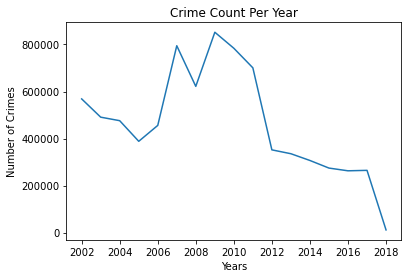

In [85]:
plt.plot(df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

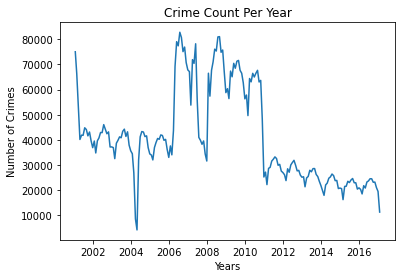

In [86]:
plt.plot(df.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

In [87]:
# preparing the data
df_arima = pd.DataFrame(df.resample('M').size().reset_index())

In [88]:
df_arima.columns =['Date','Crime Count']

In [89]:
df_arima.tail()

,Date,Crime Count
188,2016-09-30,23176
189,2016-10-31,23243
190,2016-11-30,21077
191,2016-12-31,19517
192,2017-01-31,11329


In [90]:
df_fb = df_arima.copy()

In [91]:
df_fb=df_fb.rename(columns={'Date':'ds','Crime Count':'y'})

In [92]:
df_fb

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53120
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23176
189,2016-10-31,23243
190,2016-11-30,21077
191,2016-12-31,19517


## Prophet Model

In [93]:
# import cmdstanpy
# cmdstanpy.install_cmdstan()
# cmdstanpy.install_cmdstan(compiler=True)

In [94]:
# m = Prophet()
# m.fit(df_fb)

In [95]:
# pred=m.make_future_dataframe(periods=24,freq='M')
# forcast = m.predict(pred)

In [96]:
# forcast

In [97]:
# m.plot(forcast,xlabel="Date",ylabel="Crime Rate")

In [98]:
# import json
# from prophet.serialize import model_to_json, model_from_json

# with open('fbprophet_model.json', 'w') as fout:
#     json.dump(model_to_json(m), fout)  # Save model

In [99]:
# with open('fbprophet_model.json', 'r') as fin:
#     m1 = model_from_json(json.load(fin))  # Load model

In [100]:
# x = int(input("Enter Numbers Months to forecast"))

In [101]:
# pred = m1.make_future_dataframe(periods=x ,freq = "M")
# forcast = m1.predict(pred)

In [102]:
# forcast

In [103]:
# figure = m1.plot(forcast, xlabel='Date', ylabel='Crime Rate')

In [104]:
# out=m1.plot_components(forcast,figsize=(10,10))

## Arima Model

In [105]:
df_arima.index=pd.DatetimeIndex(df_arima.Date)
df_arima.drop(['Date'], axis=1,inplace=True)

In [106]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_arima, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -0.991059
p-value                          0.756511
#Lags Used                      15.000000
Number of Observations Used    177.000000
Critical Value (1%)             -3.467845
Critical Value (5%)             -2.878012
Critical Value (10%)            -2.575551
dtype: float64


In [107]:
import pmdarima as pm

model = pm.auto_arima(df_arima['Crime Count'],m=12)

In [108]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  193
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1937.507
Date:                              Mon, 14 Aug 2023   AIC                           3887.013
Time:                                      21:27:16   BIC                           3906.558
Sample:                                  01-31-2001   HQIC                          3894.929
                                       - 01-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7895      0.101      7.838      0.000       0.592       0.987
ma.L1         -0.7783      0.110     -7.048      0.000      -0.995      -0.562
ma.L2         -0.1241      0.049     -2.527      0.011      -0.220      -0.028
ar.S.L12       0.8965      0.066     13.506      0.000       0.766       1.027
ma.S.L12      -0.7925      0.098     -8.108      0.000      -0.984      -0.601
sigma2      3.957e+07   2.33e-09    1.7e+16      0.000    3.96e+07    3.96e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.73   Jarque-Bera (JB):               646.57
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.66e+31. Standard errors may be unstable.
"""

In [109]:
train = df_arima[(df_arima.index.get_level_values(0)<'2016-09-30')]
test = df_arima[(df_arima.index.get_level_values(0)>='2016-09-30')]

In [110]:
test

,Crime Count
Date,
2016-09-30,23176
2016-10-31,23243
2016-11-30,21077
2016-12-31,19517
2017-01-31,11329


In [111]:
test.shape

(5, 1)

In [112]:
model.fit(train['Crime Count'])

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [113]:
pred=model.predict(n_periods=5,return_conf_int=True)

In [114]:
pred

(2016-09-30    23025.821417
 2016-10-31    22935.343808
 2016-11-30    20666.083787
 2016-12-31    19070.340403
 2017-01-31    20087.405398
 Freq: M, dtype: float64,
 array([[10588.00746206, 35463.63537125],
        [ 5245.15538959, 40625.53222692],
        [ -236.20871932, 41568.37629287],
        [-4101.0446119 , 42241.72541713],
        [-4810.97596392, 44985.78676049]]))

In [115]:
pred_df = pd.DataFrame(pred[0],index=test.index,columns=['Prediction'])

In [116]:
pred_df

,Prediction
Date,
2016-09-30,23025.821417
2016-10-31,22935.343808
2016-11-30,20666.083787
2016-12-31,19070.340403
2017-01-31,20087.405398


<AxesSubplot:xlabel='Date'>

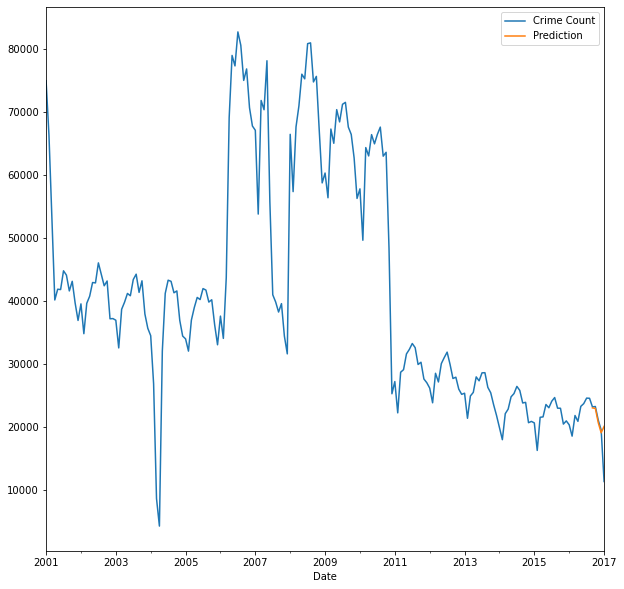

In [117]:
pd.concat([df_arima['Crime Count'],pred_df],axis=1).plot(figsize=(10,10))

In [118]:
pred1=model.predict(n_periods=15,return_conf_int=True)

In [119]:
pred_range = pd.date_range(start='2016-09-30',periods=15,freq='M')

In [120]:
pred1_df = pd.DataFrame(pred1[0],index=pred_range,columns=['Prediction'])

In [121]:
pred1_df

,Prediction
2016-09-30,23025.821417
2016-10-31,22935.343808
2016-11-30,20666.083787
2016-12-31,19070.340403
2017-01-31,20087.405398
2017-02-28,17929.004960
2017-03-31,20672.580548
2017-04-30,20786.530426
2017-05-31,22493.044775
2017-06-30,22125.400960


<AxesSubplot:>

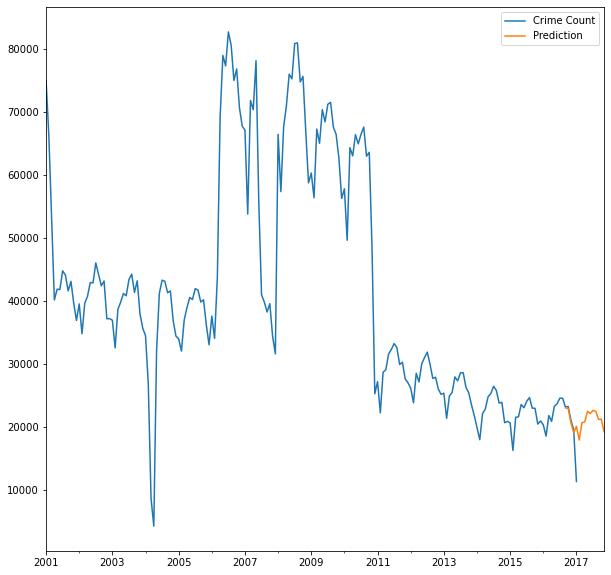

In [122]:
pd.concat([df_arima['Crime Count'],pred1_df],axis=1).plot(figsize=(10,10))

In [123]:
lower = pd.Series(pred1[1][:, 0],index =pred_range )
upper = pd.Series(pred1[1][:, 1],index =pred_range )

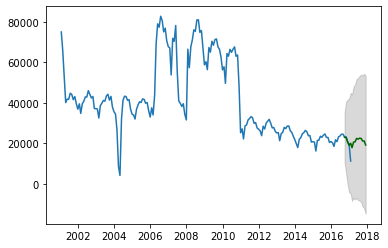

In [124]:
plt.plot(df_arima['Crime Count'])
plt.plot(pred1_df,color='darkgreen')
plt.fill_between(pred_range,lower,upper,color='k',alpha=.15)

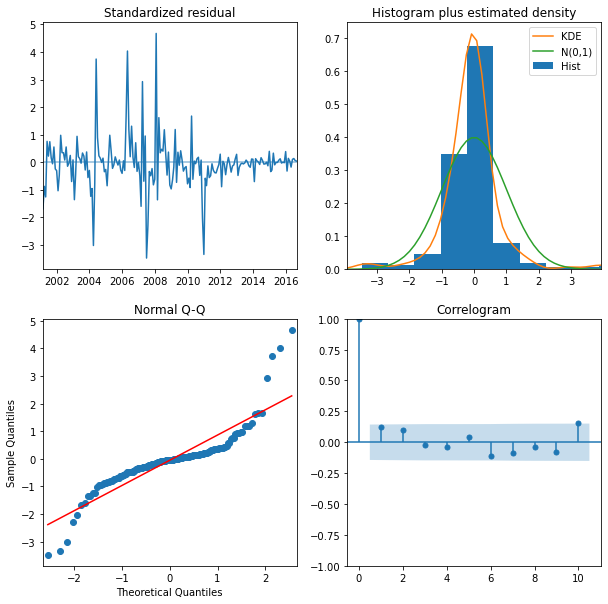

In [125]:
out=model.plot_diagnostics(figsize=(10,10))